# Give your notebook a better name than this

For help with mass spec interpretation, see http://webbook.nist.gov/chemistry/name-ser/

In [1]:
from pylab import *
%matplotlib inline

from pyRGA_convert_all import *
from pyRGA_convert_single import *
from pyRGA_fileInfo import *

# Your data goes here

## Examples

In [2]:
pyRGA__printFileInfo(inputFile="exampleData/exampleData.txt")

Data in file: exampleData/exampleData.txt
Measuring mass range 1.00 to 100.00 with accuracy 7 ,filament # 1
15 scan(s) in file
First scan started 11/8/2017 2:34:14 PM , simple sum pressure was 4.22e-09 mBar
Last scan started 11/8/2017 4:34:30 PM , simple sum pressure was 1.85e-09 mBar


### Simple semilog plot

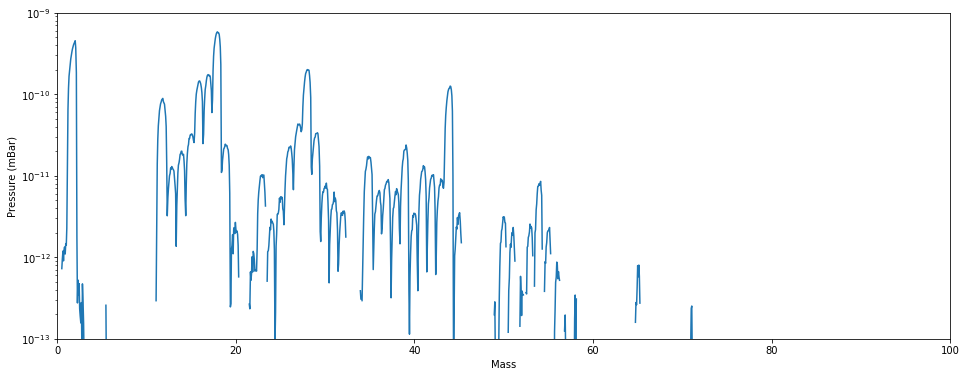

In [3]:
Mass,Intensity=pyRGA__load_Specific_Scan(inputFile="exampleData/exampleData.txt",whichScan=2)
              
# semilog plot
fig1=figure(figsize=(16,6))
ax=fig1.add_subplot(111)
line1=ax.plot(Mass,Intensity)
ax.set_yscale('log')
xlabel('Mass')
ylabel('Pressure (mBar)')
xlim(0,100)
ylim(1e-13,1e-9)
show()

### Overlay two spectra

In [4]:
Mass1,Intensity1=pyRGA__load_Specific_Scan(inputFile="exampleData/exampleData.txt",whichScan=2)
Mass2,Intensity2=pyRGA__load_Specific_Scan(inputFile="exampleData/exampleData.txt",whichScan=10)      

# semilog plot
fig1=figure(figsize=(16,6))
ax=fig1.add_subplot(111)
line1=ax.plot(Mass1,Intensity1,color='blue',label="Scan # 2")
line1=ax.plot(Mass2,Intensity2,color='red',label="Scan # 10")
ax.set_yscale('log')
xlabel('Mass')
ylabel('Pressure (mBar)')
xlim(0,80)
ylim(1e-13,1e-9)
plt.legend()
show()

### Semilog, minor ticks every 1amu

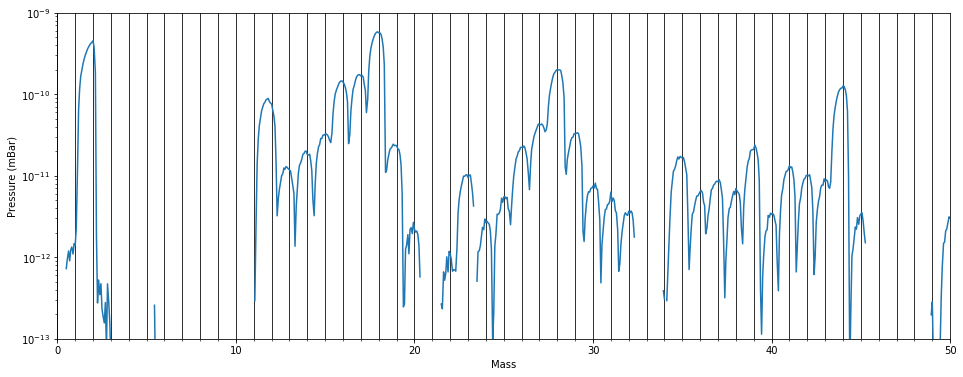

In [5]:
Mass,Intensity=pyRGA__load_Specific_Scan(inputFile="exampleData/exampleData.txt",whichScan=2)
              
# Want minor ticks every 1 amu
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
majorLocator = MultipleLocator(10)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(1)

# semilog plot
fig1=figure(figsize=(16,6))
ax=fig1.add_subplot(111)
line1=ax.plot(Mass,Intensity)
ax.set_yscale('log')
xlabel('Mass')
ylabel('Pressure (mBar)')
xlim(0,50)
ylim(1e-13,1e-9)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator)
grid(b=True, which='minor', color='black', linestyle='-',axis='x')
show()

### Annotated plot

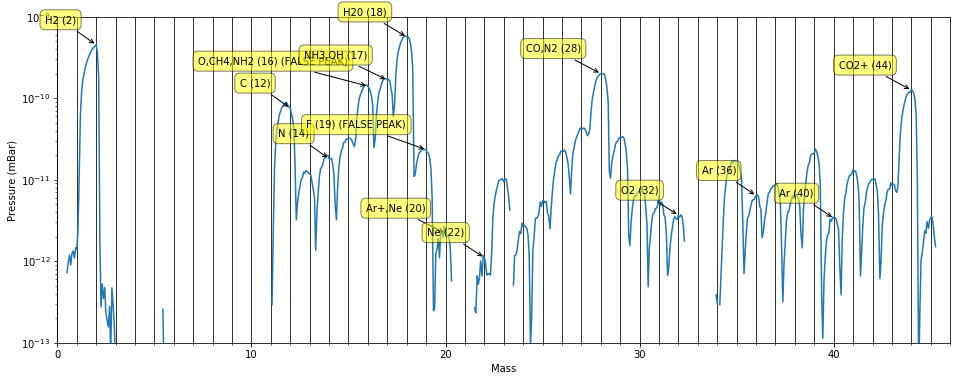

In [6]:
Mass,Intensity=pyRGA__load_Specific_Scan(inputFile="exampleData/exampleData.txt",whichScan=2)
labelThreshold=5e-13

# Want minor ticks every 1 amu
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
majorLocator = MultipleLocator(10)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(1)

# semilog plot
fig1=figure(figsize=(16,6))
ax=fig1.add_subplot(111)
line1=ax.plot(Mass,Intensity)
ax.set_yscale('log')
xlabel('Mass')
ylabel('Pressure (mBar)')
xlim(0,46)
ylim(1e-13,1e-9)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
ax.xaxis.set_minor_locator(minorLocator)
grid(b=True, which='minor', color='black', linestyle='-',axis='x')


RGA_species=[]
RGA_species.append(["H2 (2)",2])
RGA_species.append(["He (4)",4])
RGA_species.append(["C+ (6)",6])
RGA_species.append(["O+ (8)",8])
RGA_species.append(["C (12)",12])
RGA_species.append(["N (14)",14])
RGA_species.append(["O,CH4,NH2 (16) (FALSE PEAK)",16])
RGA_species.append(["NH3,OH (17)",17])
RGA_species.append(["H20 (18)",18])
RGA_species.append(["F (19) (FALSE PEAK)",19])
RGA_species.append(["Ar+,Ne (20)",20])
RGA_species.append(["Ne (22)",22])
RGA_species.append(["CO,N2 (28)",28])
RGA_species.append(["O2 (32)",32])
RGA_species.append(["Ar (36)",36])
RGA_species.append(["Ar (40)",40])
RGA_species.append(["CO2+ (44)",44])

for species in RGA_species:
    if Intensity[Mass.index(species[1])]>=labelThreshold:
        plt.annotate(species[0],xy=(species[1], Intensity[Mass.index(species[1])]), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
show()

